In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
from pandas.api.types import is_string_dtype
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from  sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
import statsmodels
import statsmodels.api as sm
import os
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

In [4]:
os.chdir(r"D:\ml\dis")

In [5]:
het=pd.read_csv(r"D:\ml\dis\HeartDisease.csv")
het.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
het.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

In [7]:
for col in ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']:
 het[col]=het[col].astype("object")


In [8]:
het.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

In [9]:
het_fea= het.iloc[:, het.columns != 'target']
het_tar= het.iloc[:, het.columns == 'target']

In [10]:
het_fea.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
het_fea.describe(include='object').T

,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


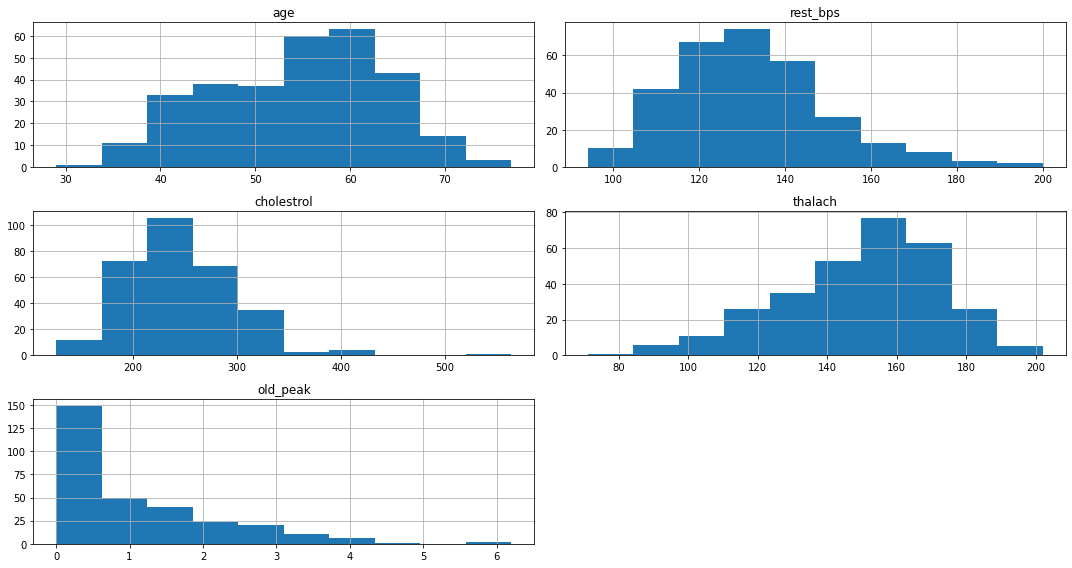

In [12]:
het_fea.hist()
plt.tight_layout()
plt.show()

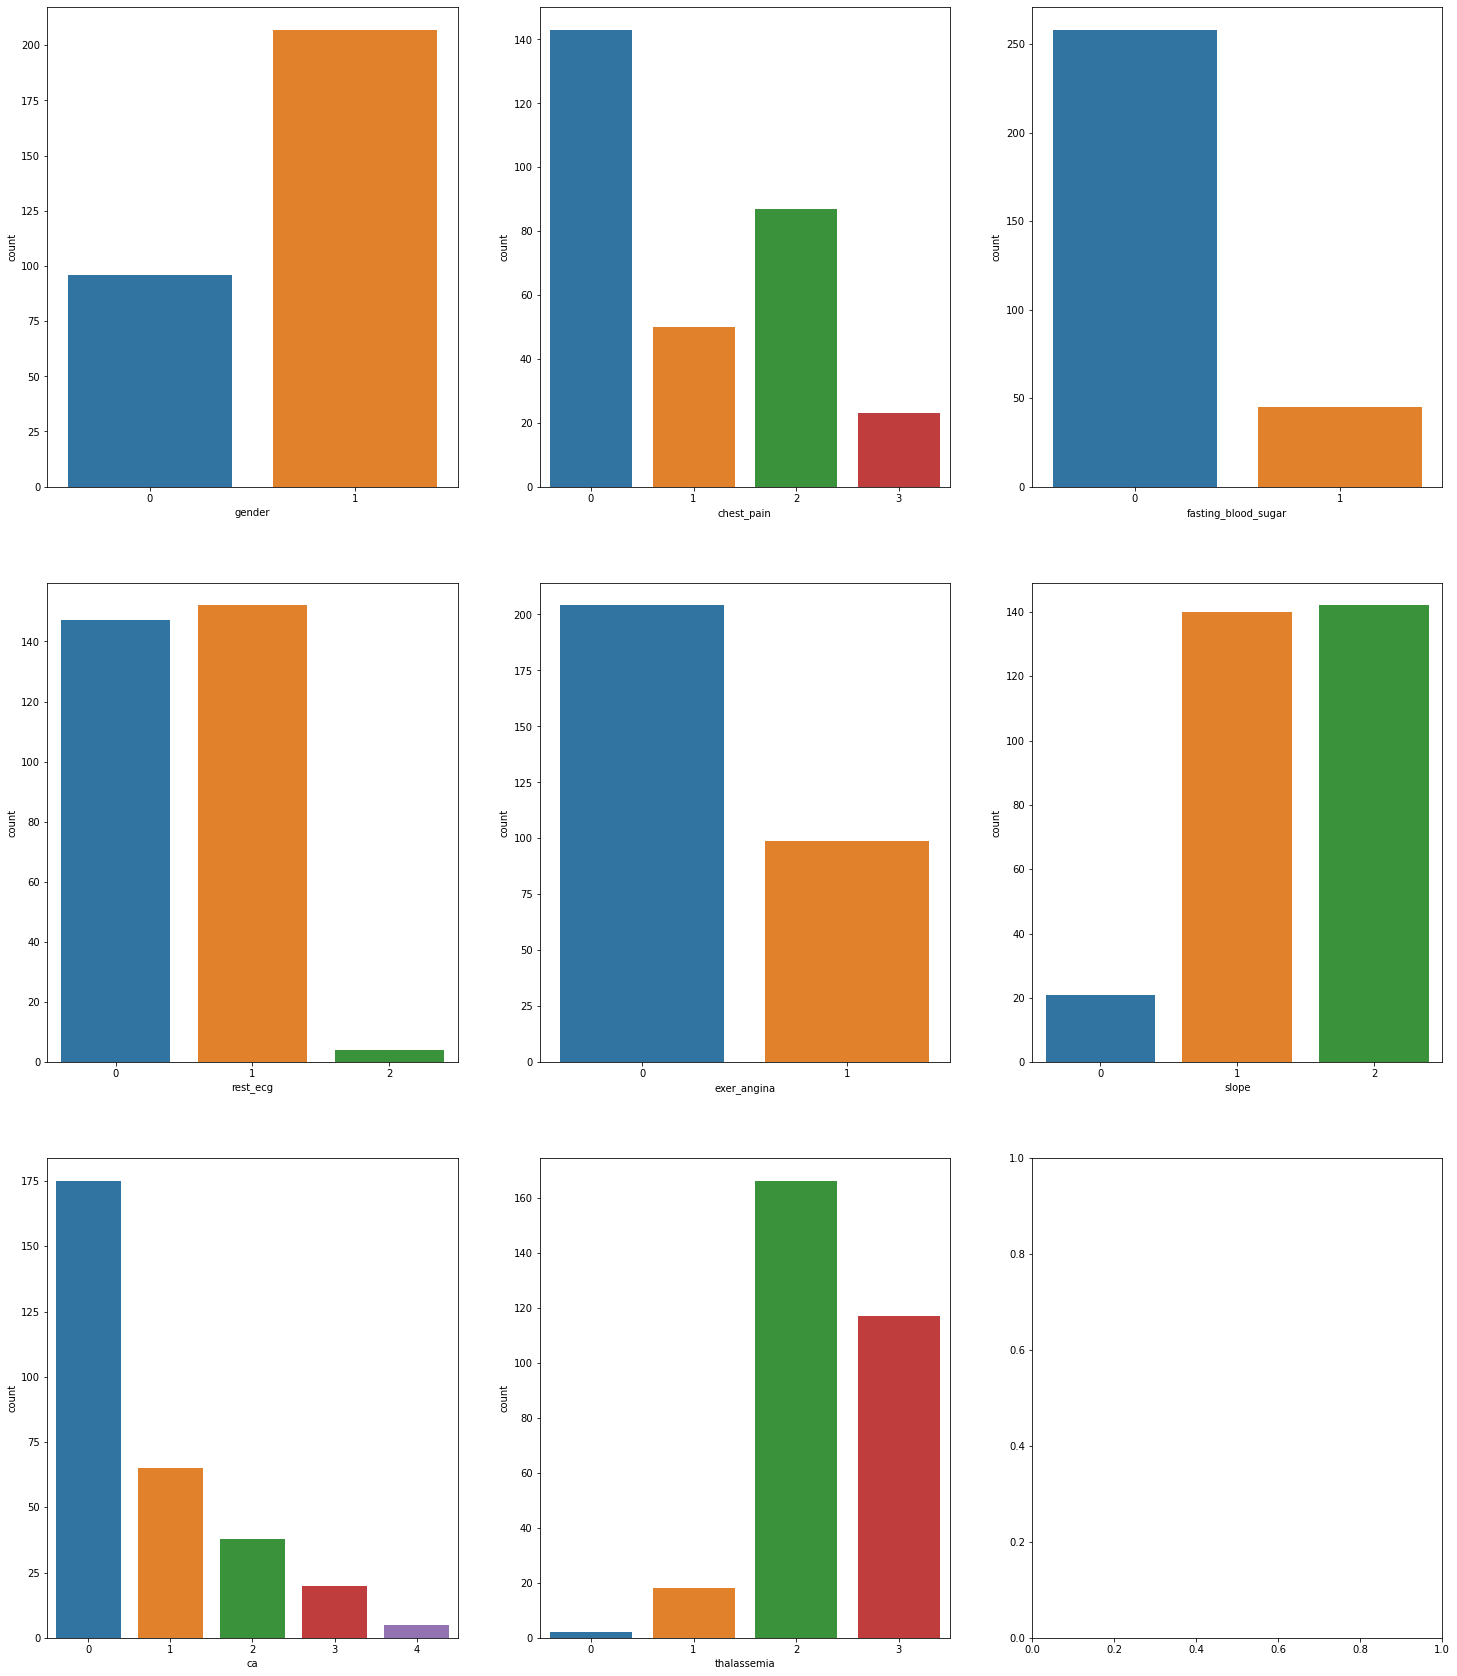

In [13]:
categorical=[]
for column in het_fea:
    if is_string_dtype(het_fea[column]):
        categorical.append(column)

fig, ax=plt.subplots(nrows = 3 ,ncols = 3 , figsize=(25,30))
for variable, subplot in zip(categorical , ax.flatten()):
    sns.countplot(het[variable], ax=subplot)
plt.show()

In [14]:
hetfreq= het_tar.target.value_counts()
hetfreq

1    165
0    138
Name: target, dtype: int64

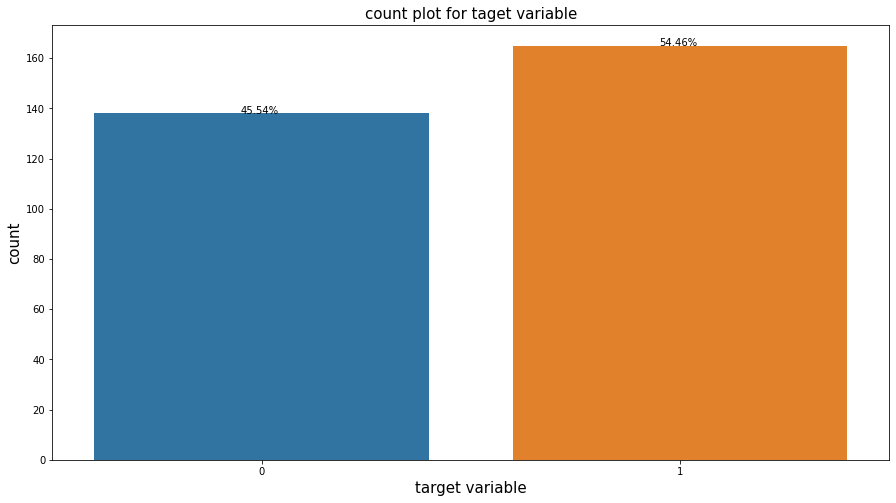

In [15]:
sns.countplot(x=het_tar.target)
plt.text(x= -0.05 , y=het_tar.target.value_counts()[0],
        s= str(round((hetfreq[0])*100/len(het_tar.target),2))  + '%' )
plt.text(x= 0.95 , y=het_tar.target.value_counts()[1],
        s= str(round((hetfreq[1])*100/len(het_tar.target),2))  + '%' )
plt.title("count plot for taget variable", fontsize=15)
plt.xlabel("target variable",fontsize=15)
plt.ylabel("count", fontsize=15)
plt.show()

In [16]:
corr=het.corr()
corr

,age,rest_bps,cholestrol,thalach,old_peak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


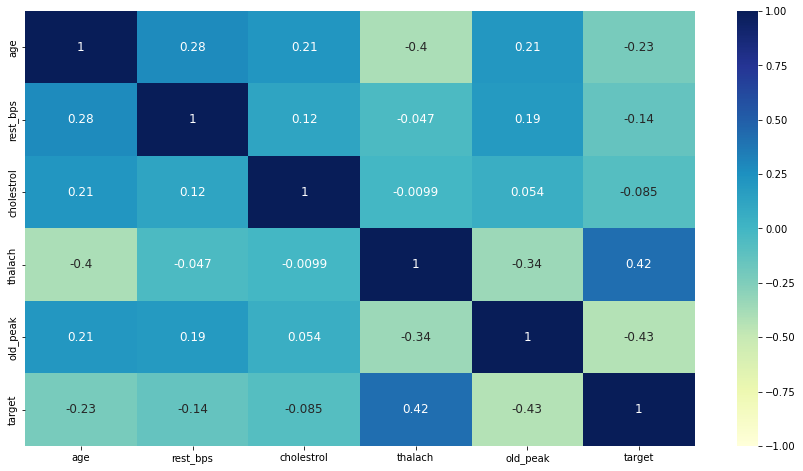

In [17]:
sns.heatmap(corr , cmap ="YlGnBu" , vmax= 1.0 , vmin=-1.0 , annot =True , annot_kws ={"size":12})
plt.show()

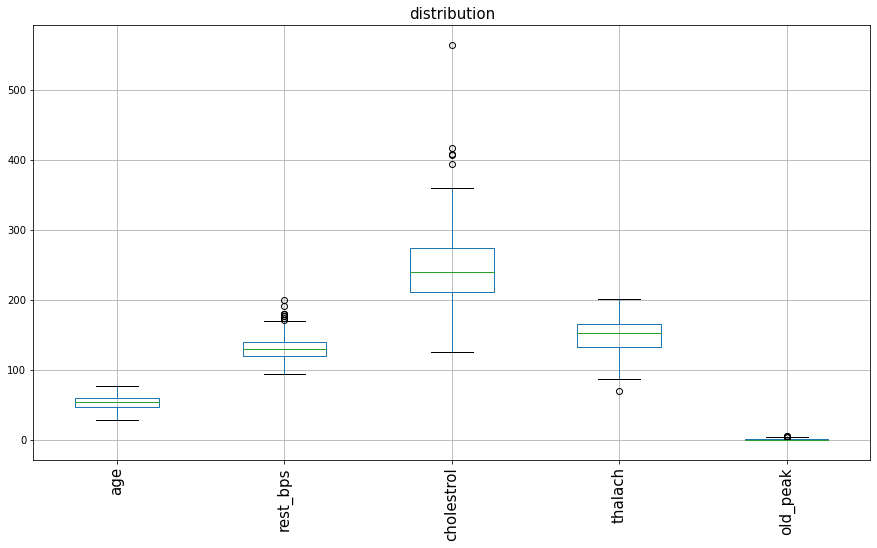

In [18]:
het_fea.boxplot()
plt.title('distribution', fontsize =15)
plt.xticks(rotation = "vertical" , fontsize =15)
plt.show()

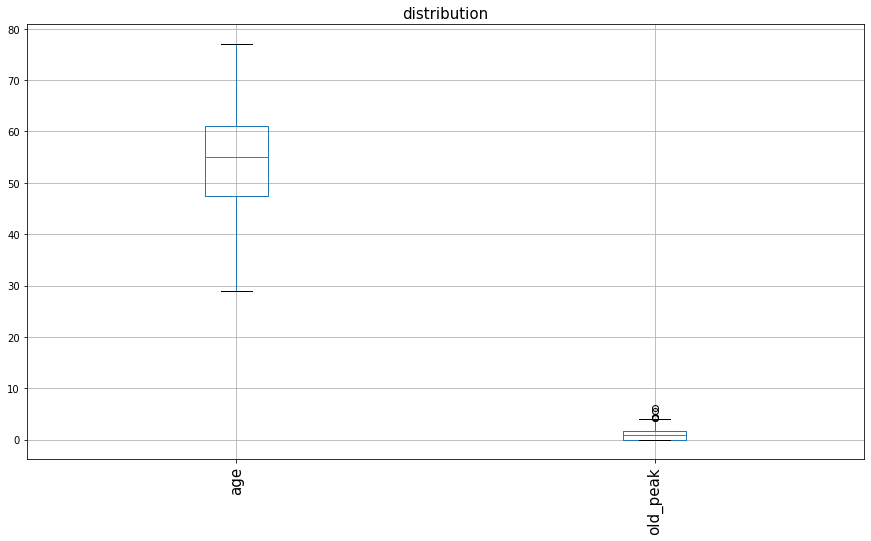

In [19]:
cols =["age" , "old_peak"]
het_fea[cols].boxplot()
plt.title('distribution', fontsize =15)
plt.xticks(rotation = "vertical" , fontsize =15)
plt.show()

In [20]:
q1 = het_fea.quantile(0.25)
q3 = het_fea.quantile(0.75)
iqr=q3-q1
print(iqr)

age           13.5
rest_bps      20.0
cholestrol    63.5
thalach       32.5
old_peak       1.6
dtype: float64


In [21]:
het= het[~((het < (q1-1.5*iqr)) | (het > (q3+1.5*iqr))).any(axis=1)]
het=het.reset_index(drop=True)

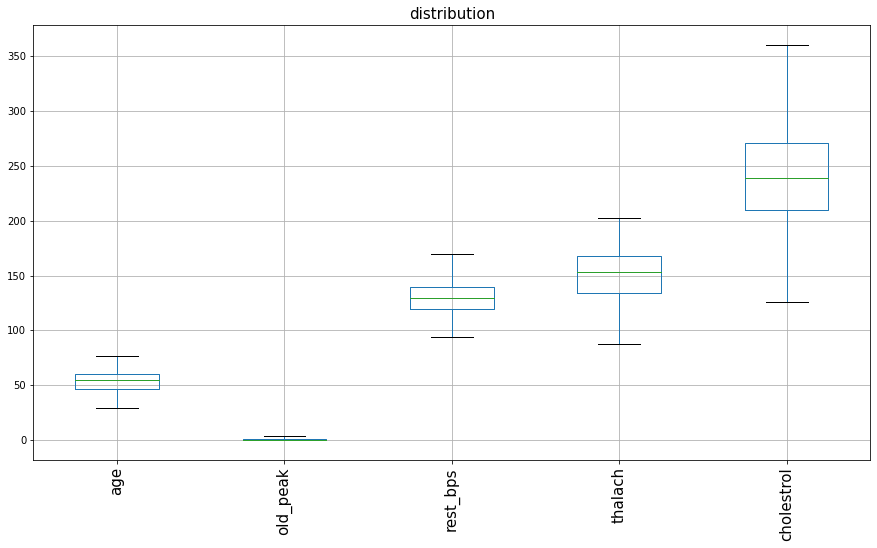

In [22]:
cols =["age" , "old_peak" , "rest_bps", "thalach" , "cholestrol"]
het[cols].boxplot()
plt.title('distribution', fontsize =15)
plt.xticks(rotation = "vertical" , fontsize =15)
plt.show()

In [23]:
het.shape

(284, 14)

In [24]:
total = het.isnull().sum().sort_values(ascending= False)
percent =het.isnull().sum()*100/het.isnull().count().sort_values(ascending= False)
misssing_data=pd.concat([total,percent], axis=1 ,keys=['total','percent'] )
misssing_data

,total,percent
age,0,0.0
gender,0,0.0
chest_pain,0,0.0
rest_bps,0,0.0
cholestrol,0,0.0
fasting_blood_sugar,0,0.0
rest_ecg,0,0.0
thalach,0,0.0
exer_angina,0,0.0
old_peak,0,0.0


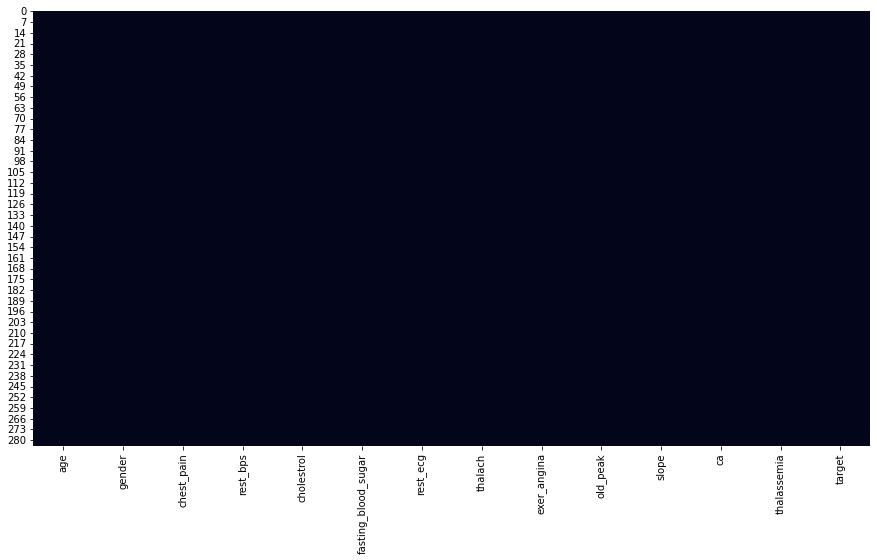

In [25]:
sns.heatmap(het.isnull(), cbar=False)
plt.show()

In [26]:
het_cat = het[categorical]
het_num=het.drop(categorical , axis=1)

In [27]:
het_cat.head()

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [28]:
hetdum= pd.get_dummies(het_cat, drop_first = True)

In [29]:
hetdum.head()

,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [30]:
dummy=pd.concat([het_num,hetdum],axis=1)
dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [31]:
y= pd.DataFrame(dummy['target'])

In [32]:
x=dummy.drop('target',axis=1)

In [33]:
x.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [34]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [47]:
def get_test_repot(model):
    return(classification_report(y_test,y_pred))

In [36]:
def kappa_score(model):
    return(cohen_kappa_score(y_test,y_pred))

In [37]:
def plot_confusion_matrix(model):
    cm= confusion_matrix(y_test , y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',],
                              index=['Actual:0','Actual:1']) 
    sns.heatmap(conf_matrix , annot= True , fmt='d' , cmap= ListedColormap(['lightskyblue']),
               cbar=False , linewidths = 0.1 , annot_kws = { 'size':25})
    plt.xticks(fontsize =20)
    plt.yticks(fontsize = 20)
    plt.show()

In [38]:
def plt_roc(model):
    fpr, tpr , _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.plot([0,1], [0,1], 'r--')
    plt.title('roc curve for h1n1 vac classifier' , fontsize = 15)
    plt.xlabel( ' False positive rate (1-specficity)' , fontsize =15)
    plt.ylabel( ' true positive rate (sensitivity)' , fontsize =15)
    plt.text (x= 0.02, y=0.9 , s=('auc score:',round(roc_auc_score(y_test , y_pred_prob),4)))
    plt.grid(True)

In [39]:
score_card = pd.DataFrame(columns=["Model", "AUC score", "Precision Score", "Recall Score", 
                                  "Accuracy Score", "Kappa Score", "f1 Score"])

def update_score_card(model_name):
    
    global score_card
    
    score_card = score_card.append({"Model" : model_name,
                                   "AUC score" : roc_auc_score(y_test, y_pred_prob),
                                   "Precision Score" : metrics.precision_score(y_test, y_pred),
                                   "Recall Score" : metrics.recall_score(y_test, y_pred),
                                   "Accuracy Score" : metrics.accuracy_score(y_test, y_pred),
                                   "Kappa Score" : cohen_kappa_score(y_test, y_pred),
                                   "f1 Score": metrics.f1_score(y_test, y_pred)},
                                   ignore_index=True)
    return(score_card)

In [40]:
 x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

print("x_train",x_train.shape)
print("y_train",y_train.shape)
print("x_test",x_test.shape)
print("y_test",y_test.shape)

x_train (198, 22)
y_train (198, 1)
x_test (86, 22)
y_test (86, 1)


In [41]:
dectree=DecisionTreeClassifier(criterion='entropy',random_state= 10)
dectre=dectree.fit(x_train,y_train)

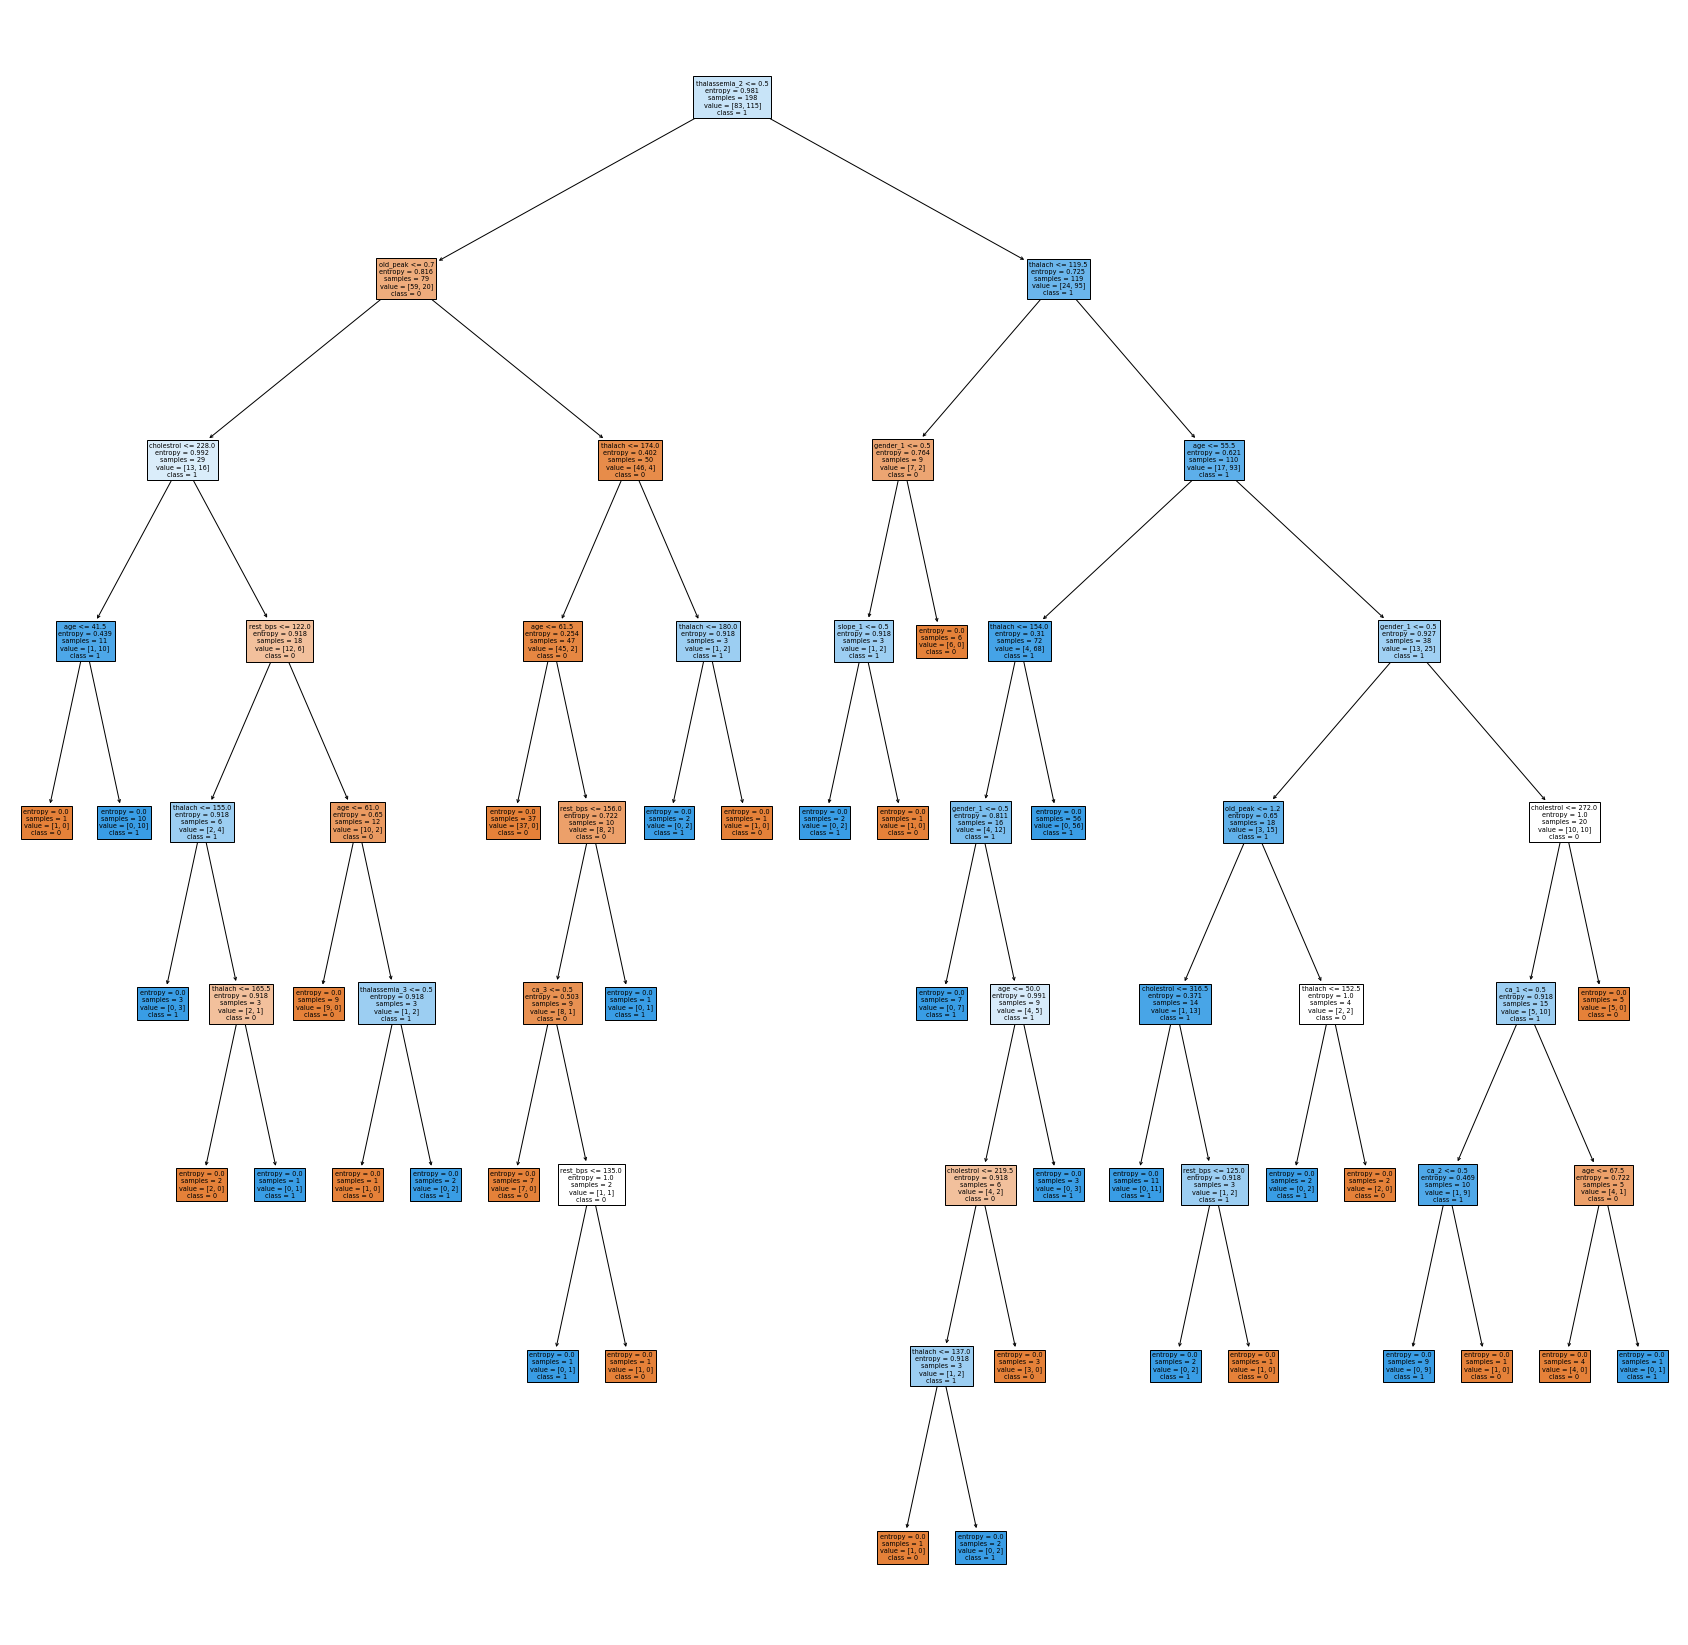

In [42]:
labels= x_train.columns
fig = plt.figure(figsize=(30,30))
_=tree.plot_tree(dectre,
                feature_names=labels,
                class_names=['0','1'],
                filled=True)

In [43]:
dot_data = tree.export_graphviz(dectre, out_file="dt.dpt",
                              feature_names=labels,
                class_names=['0','1'],
                filled=True )

In [44]:
y_pred_prob=dectre.predict_proba(x_test)[:,1]
y_pred_prob

array([1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0.])

In [45]:
y_pred= dectre.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [50]:
test_report = get_test_repot(dectre)
print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.74      0.66      0.70        44

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86



In [51]:
kappa = kappa_score(dectre) 
print(kappa)

0.41985968699406373


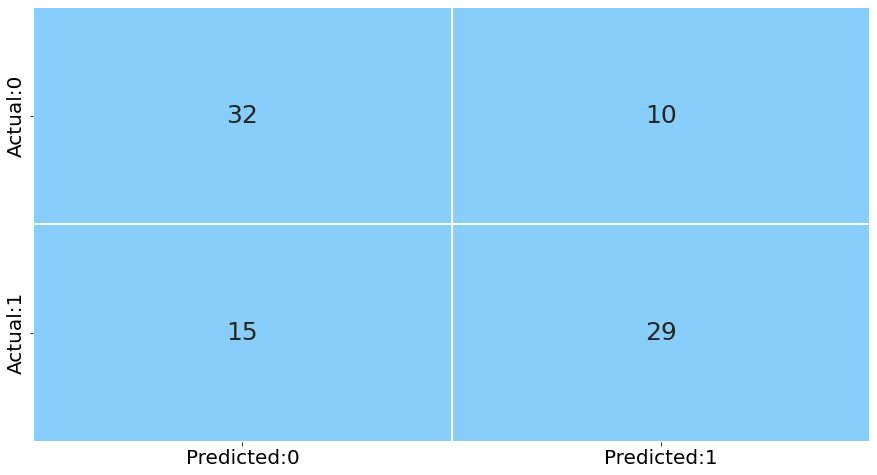

In [52]:
plot_confusion_matrix(dectre)

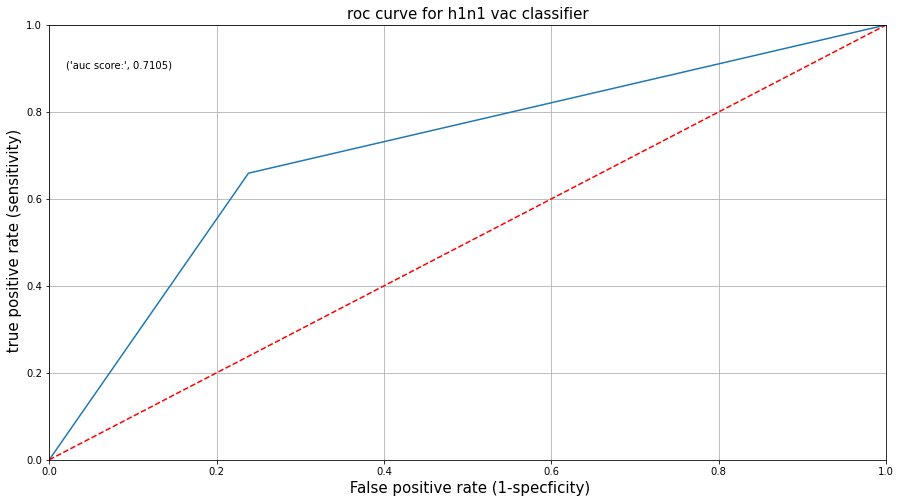

In [53]:
 plt_roc(dectre)

In [54]:
update_score_card(model_name= 'dec')

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,dec,0.710498,0.74359,0.659091,0.709302,0.41986,0.698795


In [55]:
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes=25, random_state=10)
prun=prune.fit(x_train,y_train)

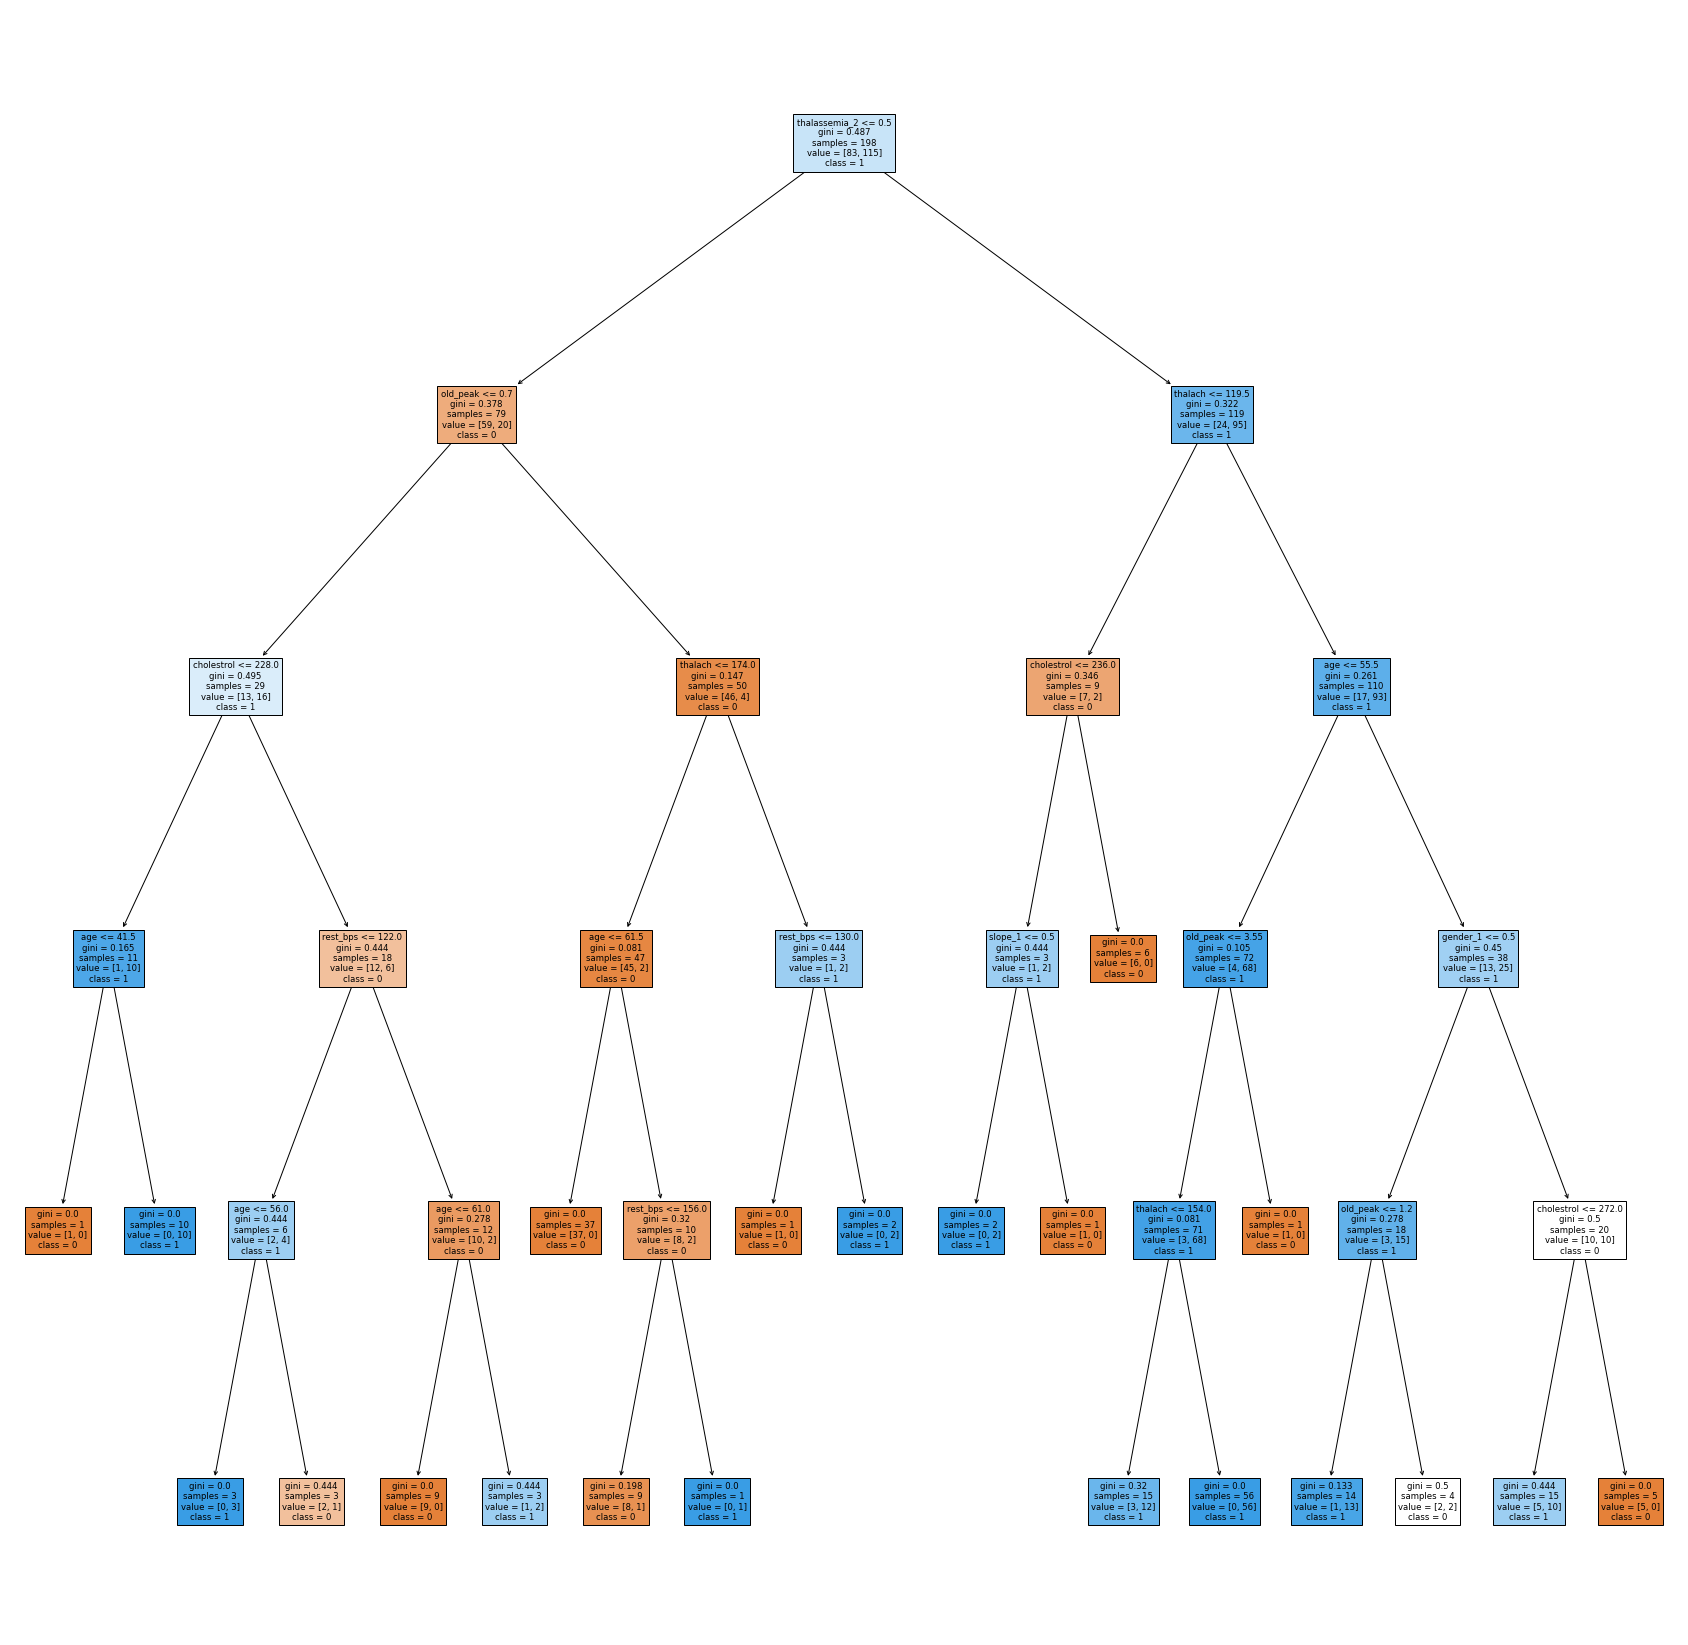

In [56]:
labels= x_train.columns
fig = plt.figure(figsize=(30,30))
_=tree.plot_tree(prun,
                feature_names=labels,
                class_names=['0','1'],
                filled=True)

In [57]:
dot_data = tree.export_graphviz(prun, out_file="dt.dpt",
                              feature_names=labels,
                class_names=['0','1'],
                filled=True )

In [58]:
y_pred_prob=prun.predict_proba(x_test)[:,1]
y_pred_prob

array([1.        , 1.        , 1.        , 0.92857143, 0.        ,
       0.11111111, 0.        , 1.        , 0.11111111, 0.        ,
       0.92857143, 1.        , 0.8       , 1.        , 0.        ,
       0.66666667, 0.        , 0.        , 0.        , 0.92857143,
       0.11111111, 0.        , 0.5       , 1.        , 1.        ,
       0.92857143, 0.66666667, 0.        , 0.92857143, 1.        ,
       0.5       , 0.        , 0.        , 0.11111111, 1.        ,
       0.8       , 0.        , 0.92857143, 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.66666667, 0.        ,
       0.        , 0.8       , 0.8       , 0.8       , 0.11111111,
       1.        , 1.        , 0.        , 0.        , 0.92857143,
       0.66666667, 1.        , 0.        , 0.        , 0.11111111,
       0.92857143, 0.        , 0.8       , 0.66666667, 0.        ,
       1.        , 1.        , 0.8       , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.     

In [59]:
y_pred= prun.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [60]:
test_report = get_test_repot(prun)
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.74      0.70      0.72        44

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



In [61]:
kappa = kappa_score(prun) 
print(kappa)

0.4421621621621622


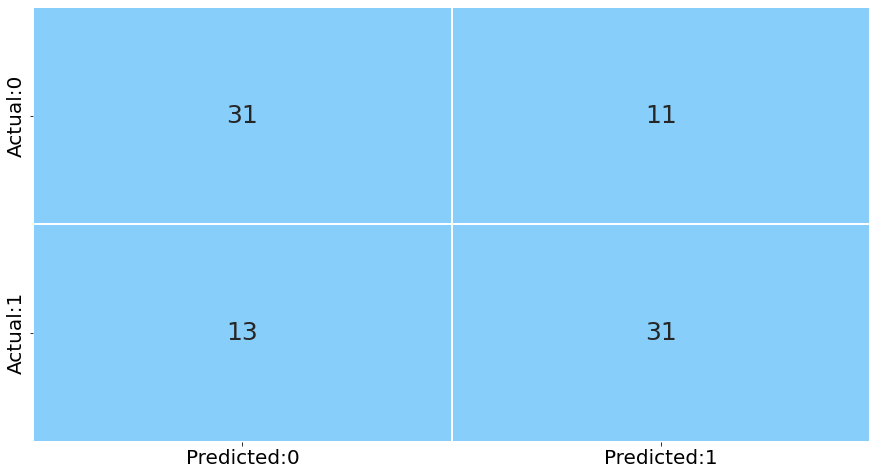

In [62]:
plot_confusion_matrix(prun)

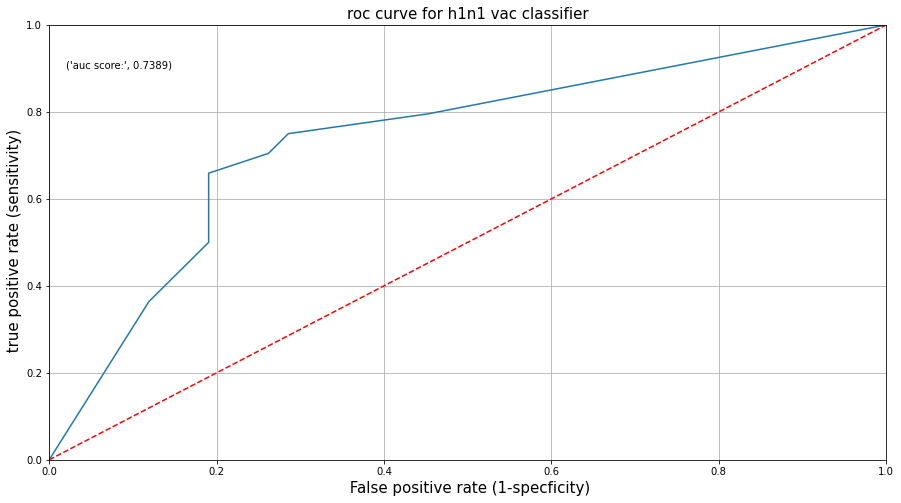

In [63]:
 plt_roc(prun)

In [64]:
update_score_card(model_name= 'dec prun')

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,dec,0.710498,0.74359,0.659091,0.709302,0.41986,0.698795
1,dec prun,0.738907,0.738095,0.704545,0.72093,0.442162,0.72093
